In [378]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import requests, json, random, time, tqdm, warnings
seed=111
path='/Users/Christian/Dropbox/Universitet/TSODAS/TSDS-gruppe-2019/Exam/'

### Loading data

In [407]:
r1=pd.read_pickle(path+'prices_0_200.pkl')
r2=pd.read_pickle(path+'prices_200_578.pkl')
r3=pd.read_pickle(path+'prices_577_777.pkl')
r4=pd.read_pickle(path+'prices_777_1000.pkl')
r5=pd.read_pickle(path+'prices_1000_1500.pkl')
r6=pd.read_pickle(path+'prices_1500_2000.pkl')
r7=pd.read_pickle(path+'prices_2000_3000.pkl')
r8=pd.read_pickle(path+'prices_3000_3240.pkl')
r9=pd.read_pickle(path+'prices_3240_4000.pkl')
r10=pd.read_pickle(path+'prices_4000_.pkl')
#print(len(r1), len(r2), len(r3), len(r4), len(r5), len(r6))
r=r1.append(r2, ignore_index=True)
r=r.append(r3, ignore_index=True)
r=r.append(r4, ignore_index=True)
r=r.append(r5, ignore_index=True)
r=r.append(r6, ignore_index=True)
r=r.append(r7, ignore_index=True)
r=r.append(r8, ignore_index=True)
r=r.append(r9, ignore_index=True)
r=r.append(r10, ignore_index=True)


r.to_pickle('scraping_data.pkl')


In [450]:
r=pd.read_pickle('scraping_data.pkl')
t=pd.read_pickle(path+'/Prediction/missings_190528.pkl')
r=r.append(t, ignore_index=True)


r=r.loc[(r.price !='-') & (r.price != 'Ingen')]
r=r.drop_duplicates(['origin','destination'])
r['price']=r['price'].str[4:].str.replace('.','')
r['price']=pd.to_numeric(r.price, errors='coerce')
r=r.drop_duplicates(['origin','destination'])
pred=pd.read_pickle(path+'FlightsML.pkl')

pred_data=r.merge(pred, how='right', left_on=['origin','destination'], right_on=['Origin', 'Dest'])


missings = pred_data[pred_data['price'].isna()==True]
pred_data=pred_data[pred_data['count']>=52]
pred_data = pred_data[pred_data['price'].isna()!=True]
pred_data = pred_data[pred_data['price']<5000]

In [447]:
pred_data

,alternative,day,destination,label,origin,price,Origin,Dest,Distance,count,avg_time_mins,companies,Origin_flights,Destination_flights,origin_degree,dest_degree,origin_btwns,dest_btwns,origin_clustcoef,dest_clustcoef
0,,0.0,ONT,1 omstigning,SMF,898.0,SMF,ONT,389,4093,71.234185,1,116158,83287.0,44.0,40.0,0.011491,0.003241,0.011491,0.003241
1,NaN,0.0,PDX,Direkte,SMF,1190.0,SMF,PDX,479,2721,83.317127,2,116158,117237.0,44.0,43.0,0.011491,0.003647,0.011491,0.003647
2,NaN,0.0,PHX,Direkte,SMF,1003.0,SMF,PHX,647,4184,106.243087,3,116158,422170.0,44.0,88.0,0.011491,0.028447,0.011491,0.028447
3,NaN,0.0,SAN,Direkte,SMF,570.0,SMF,SAN,480,4895,81.599257,2,116158,194618.0,44.0,53.0,0.011491,0.002061,0.011491,0.002061
4,NaN,0.0,SEA,Direkte,SMF,905.0,SMF,SEA,605,3519,106.077896,2,116158,218274.0,44.0,61.0,0.011491,0.044200,0.011491,0.044200
5,,0.0,SNA,1 omstigning,SMF,1094.0,SMF,SNA,404,3140,82.026290,2,116158,105895.0,44.0,29.0,0.011491,0.002812,0.011491,0.002812
6,NaN,0.0,LAS,Direkte,SNA,820.0,SNA,LAS,226,4173,64.800634,2,105895,367359.0,29.0,92.0,0.002812,0.017767,0.002812,0.017767
7,Ingen,0.0,MDW,1 omstigning,SNA,2108.0,SNA,MDW,1731,276,221.792727,1,105895,191719.0,29.0,59.0,0.002812,0.002208,0.002812,0.002208
8,NaN,0.0,OAK,Direkte,SNA,1688.0,SNA,OAK,371,4928,80.344672,2,105895,149894.0,29.0,39.0,0.002812,0.001451,0.002812,0.001451
9,NaN,0.0,PHX,Direkte,SNA,1096.0,SNA,PHX,338,5879,74.110728,3,105895,422170.0,29.0,88.0,0.002812,0.028447,0.002812,0.028447


### Exploring data

In [455]:

X=pred_data[['Distance','count', 'avg_time_mins', 'Origin_flights', 'Destination_flights', 'origin_degree', 
        'dest_degree', 'origin_btwns', 'dest_btwns', 'Origin','Dest', 'label']]
y=pred_data['price']

X=pd.get_dummies(data=X, columns=['Origin', 'Dest', 'label'])
#X.drop(['Origin','Dest'], inplace=True, axis=1)

In [442]:
X.dtypes

Distance                 int64
count                    int64
avg_time_mins          float64
Origin_flights           int64
Destination_flights    float64
origin_degree          float64
dest_degree            float64
dest_btwns             float64
origin_clustcoef       float64
Origin_ABE               uint8
Origin_ABI               uint8
Origin_ABQ               uint8
Origin_ABY               uint8
Origin_ACK               uint8
Origin_ACT               uint8
Origin_ACV               uint8
Origin_ACY               uint8
Origin_ADQ               uint8
Origin_AEX               uint8
Origin_AGS               uint8
Origin_AKN               uint8
Origin_ALB               uint8
Origin_ALO               uint8
Origin_AMA               uint8
Origin_ANC               uint8
Origin_ASE               uint8
Origin_ATL               uint8
Origin_ATW               uint8
Origin_AUS               uint8
Origin_AVL               uint8
                        ...   
Dest_STT                 uint8
Dest_STX

(array([ 224.,  877., 1353., 1030.,  515.,  238.,  106.,   51.,   22.,
          12.]),
 array([ 129. ,  607.1, 1085.2, 1563.3, 2041.4, 2519.5, 2997.6, 3475.7,
        3953.8, 4431.9, 4910. ]),
 <a list of 10 Patch objects>)

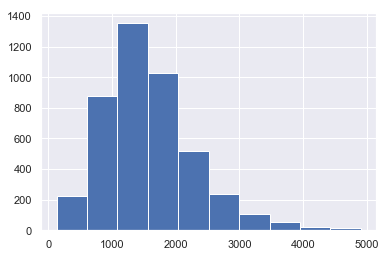

In [446]:
plt.hist(y)

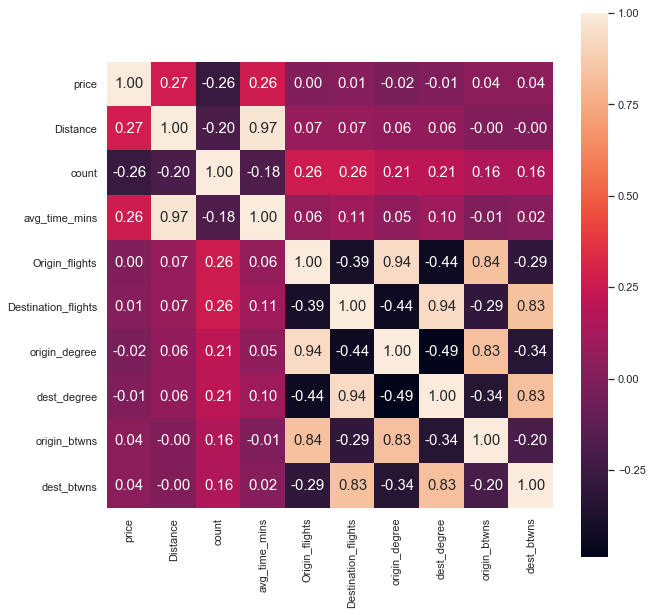

In [456]:
# Look at the Correlation matrix
cols = ['price','Distance','count', 'avg_time_mins', 'Origin_flights', 'Destination_flights', 'origin_degree', 
        'dest_degree', 'origin_btwns', 'dest_btwns']
fig4, hm = plt.subplots(figsize=(10,10))
cm = np.corrcoef(pred_data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)



In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)

### Estimating model

In [457]:
###########################
#        LASSO CV         #
###########################
lambdas = np.logspace(-4,4, 12)
kfolds = KFold(n_splits=10)
RMSE_lassoCV = []

for lambda_ in lambdas:
    print('This was lambda = ' + str(lambda_))
    pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3,include_bias=False), 
                                  StandardScaler(),
                                  Lasso(alpha=lambda_, random_state=1))    
    RMSE_lassoCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        
        X_train, y_train, = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        RMSE_lassoCV_.append(mse(y_val, pipe_lassoCV.predict(X_val))**(1/2)) 
    RMSE_lassoCV.append(RMSE_lassoCV_)

optimalCV = pd.DataFrame(RMSE_lassoCV, index=lambdas).mean(axis=1).nsmallest(1)
print(optimalCV) # This prints optimal lambda and RMSE. 

# Fit training data with optimal lambda
pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), 
                                StandardScaler(),
                                Lasso(alpha=optimalCV.index[0]))

This was lambda = 0.0001
This was lambda = 0.0005336699231206312
This was lambda = 0.002848035868435802
This was lambda = 0.01519911082952933
This was lambda = 0.08111308307896872
This was lambda = 0.43287612810830617
This was lambda = 2.310129700083158
This was lambda = 12.32846739442066
This was lambda = 65.79332246575683
This was lambda = 351.11917342151344
This was lambda = 1873.8174228603868
This was lambda = 10000.0
2.31013    512.76351
dtype: float64


In [367]:
pipe_linear = make_pipeline(Lasso(alpha=1.0,random_state=seed))
model=Lasso(alpha=1.0,random_state=seed)
scores = cross_val_score(estimator=model, X=X, y=y , cv=10)
param_range_1 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.37594098  0.32160238  0.28967012  0.24182844  0.26472579  0.45085766
  0.26276271 -0.04702097  0.26160703  0.27069205]
CV accuracy: 0.269 +/- 0.122


In [242]:
# Validation curve
train_scores, test_scores = validation_curve(
    estimator=model,
    X=X,
    y=y,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o',
    markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(param_range, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='validation accuracy')
plt.fill_between(param_range,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

NameError: name 'param_range' is not defined

In [ ]:
### Grid search
param_range_1 = [0.0001, 0.001, 0.01, 0.1,
    1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
    'svc__gamma': param_range,
    'svc__kernel': ['rbf']}]

### Estimating model

In [ ]:

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array


# 
lm = linear_model.LinearRegression()


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print(“Cross-Predicted Accuracy:”, accuracy)


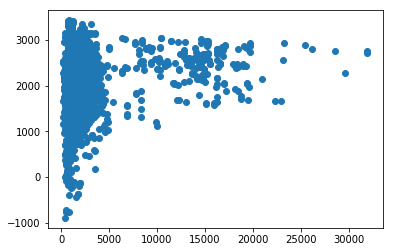

In [243]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [330]:
X.dtypes

alternative            category
day                     float64
destination              object
label                  category
origin                   object
price                   float64
alternative_cat         float64
label_cat               float64
Distance                  int64
count                     int64
avg_time_mins           float64
companies                 int64
Origin_flights            int64
Destination_flights     float64
origin_degree           float64
dest_degree             float64
origin_btwns            float64
dest_btwns              float64
origin_clustcoef        float64
dest_clustcoef          float64
Origin_ABE                uint8
Origin_ABI                uint8
Origin_ABQ                uint8
Origin_ABY                uint8
Origin_ACT                uint8
Origin_ACV                uint8
Origin_ACY                uint8
Origin_ADQ                uint8
Origin_AEX                uint8
Origin_AGS                uint8
                         ...   
Dest_SNA